https://prappleizer.github.io/Tutorials/MCMC/MCMC_Tutorial.html

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
# %matplotlib inline
# plt.rcParams['figure.figsize'] = (15,10)


In [30]:
frequency = np.array([22.0,45.0,150.0,408.0,1420.0,23000.0]) #x_values
#b_temp = np.array([5.49282937e+04, 1.04875149e+04, 5.57289208e+02, 4.39957717e+01, 4.37429422e+00, 1.07386277e-03])
b_temp = np.array([2.55080863e+04, 4.90777800e+03, 2.28984753e+02, 2.10842949e+01, 3.58631166e+00, 5.68716056e-04]) #y_values

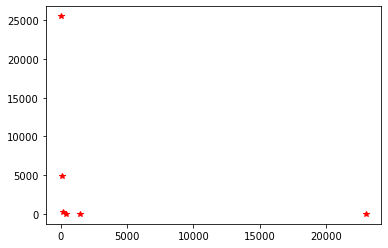

In [31]:
plt.plot(frequency,b_temp, 'r*')

In [32]:
# #Defining the model for emcee
# def concave_func(x, C_1, C_2, alpha_one, alpha_two, I_x, nu_t, T_e): 
#     one = x**(-alpha_one)
#     two = (C_2/C_1)*(x**(-alpha_two))
#     three = I_x*(x**-2.1)
#     expo = np.exp(-1*((nu_t/x)**2.1))
#     eqn_one = C_1*(one + two + three)*expo
#     eqn_two = T_e*(1 - expo)
#     return eqn_one + eqn_two

# def model(theta,frequency=frequency):
#     C_1, C_2, alpha_one, alpha_two, I_x, nu_t, T_e = theta
#     model = concave_func(frequency, C_1, C_2, alpha_one, alpha_two, I_x, nu_t, T_e)
#     return model

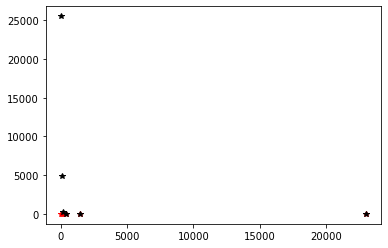

In [33]:
#Defining the model for emcee

def model(theta,x=frequency):
    C_1, C_2, alpha_one, alpha_two, I_x, nu_t, T_e = theta
    one = x**(-alpha_one)
    two = (C_2/C_1)*(x**(-alpha_two))
    three = I_x*(x**(-2.1))
    expo = np.exp(-1*((nu_t/x)**2.1))
    eqn_one = C_1*(one + two + three)*expo
    eqn_two = T_e*(1 - expo)
    model = eqn_one + eqn_two
    return model
plt.figure()
plt.plot(frequency,model((25000, 1000, 2.5, 2.58, 8.39e-10, 0.3, 2060),x=frequency), 'r*')

plt.plot(frequency,b_temp, 'k*')

In [34]:
# def chisq(params, xobs, yobs):
#     ynew = concave_func(xobs, *params)
#     #yerr = np.sum((ynew- yobs)**2)
#     yerr = np.sum(((yobs- ynew)/ynew)**2)
#     print(yerr)
#     return yerr

In [35]:
def lnlike(theta, x, y, yerr):
#     C_1, C_2, alpha_one, alpha_two, I_x, nu_t, T_e = theta[0], theta[1], theta[2], theta[3], theta[4], theta[5], theta[6]
    C_1, C_2, alpha_one, alpha_two, I_x, nu_t, T_e = theta
    LnLike = np.sum(((y- model(theta,x))/yerr)**2)#implement formula above
    return LnLike

In [36]:
def lnprior(theta):
    C_1, C_2, alpha_one, alpha_two, I_x, nu_t, T_e = theta
    if -1000 < C_1 < 1000 and -1000 < C_2 < 1000 and 2 <= alpha_one <=3 and 2 <= alpha_two <= 3 and  1e-12 < I_x < 1e-9  and 0.01 < nu_t < 5 and 100 < T_e < 10000:
#     if 2<= alpha_one <=3 and 2 <= alpha_two <= 3 and 0 <= T_e <=10e+3 and -np.inf < C_1 < +np.inf and -np.inf < C_2 < +np.inf and -np.inf < I_x < +np.inf and -np.inf < nu_t < +np.inf: 
#     if alpha_one <=3 and alpha_one >= 2 and alpha_two <=3 and alpha_two >= 2 and T_e > 0 and T_e <= 10e3 and T_e > 0: 
        return 0.0
    else:
        return -np.inf

In [37]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):#check if lp is infinite:
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)


In [54]:
Terr = 0.05*np.average(b_temp)#set to 5% of average temperature
data = (frequency, b_temp,Terr)
nwalkers = 100
niter = 10000
initial = np.array([25000, 1000, 2.5, 2.58, 8.39e-10, 0.3, 2060])
ndim = len(initial)
p0 = [np.array(initial) + 1e-1 *np.array(initial)* np.random.randn(ndim) for i in range(nwalkers)]

In [55]:
# def main(p0,nwalkers,niter,ndim,lnprob,data):
    # sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=data)
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args = (frequency, b_temp, Terr))
sampler.run_mcmc(p0, niter, progress = True)
    # print("Running burn-in...")
    # p0, _, _ = sampler.run_mcmc(p0, 100)
    # sampler.reset()

    # print("Running production...")
    # pos, prob, state = sampler.run_mcmc(p0, niter)

    # return sampler, pos, prob, state

  0%|          | 0/10000 [00:00<?, ?it/s]/home/pratush/anaconda3/envs/saras/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 10000/10000 [00:08<00:00, 1177.40it/s]


State([[1.94911251e+04 1.09101063e+03 2.83622291e+00 2.40475551e+00
  8.86983111e-10 3.25946375e-01 2.29645631e+03]
 [3.19668333e+04 9.31948129e+02 2.48563233e+00 2.62547143e+00
  8.38855380e-10 3.13198361e-01 1.85125261e+03]
 [2.58108114e+04 8.87924188e+02 2.53004204e+00 2.38606985e+00
  7.42961984e-10 2.52450316e-01 1.99867800e+03]
 [1.97802471e+04 1.12706902e+03 2.84866938e+00 2.65248326e+00
  8.29239009e-10 2.66915049e-01 2.04868698e+03]
 [2.31163597e+04 1.13103699e+03 2.84684440e+00 2.77582025e+00
  8.82454548e-10 3.10778148e-01 2.07607296e+03]
 [2.39711818e+04 9.64399295e+02 2.53758006e+00 2.52424891e+00
  9.48657591e-10 3.29269229e-01 1.89230418e+03]
 [2.33358841e+04 1.06173577e+03 2.23891608e+00 2.53078665e+00
  8.00725293e-10 2.71512809e-01 2.28606875e+03]
 [2.45241857e+04 8.99876915e+02 2.40754790e+00 2.34635034e+00
  9.27376323e-10 2.87441498e-01 2.16647218e+03]
 [2.24611761e+04 7.93912961e+02 2.64812372e+00 2.58464080e+00
  8.33915870e-10 2.75041774e-01 1.89699588e+03]
 [2.

In [59]:
flat_samples = sampler.get_chain(discard=100, thin=1, flat=True)

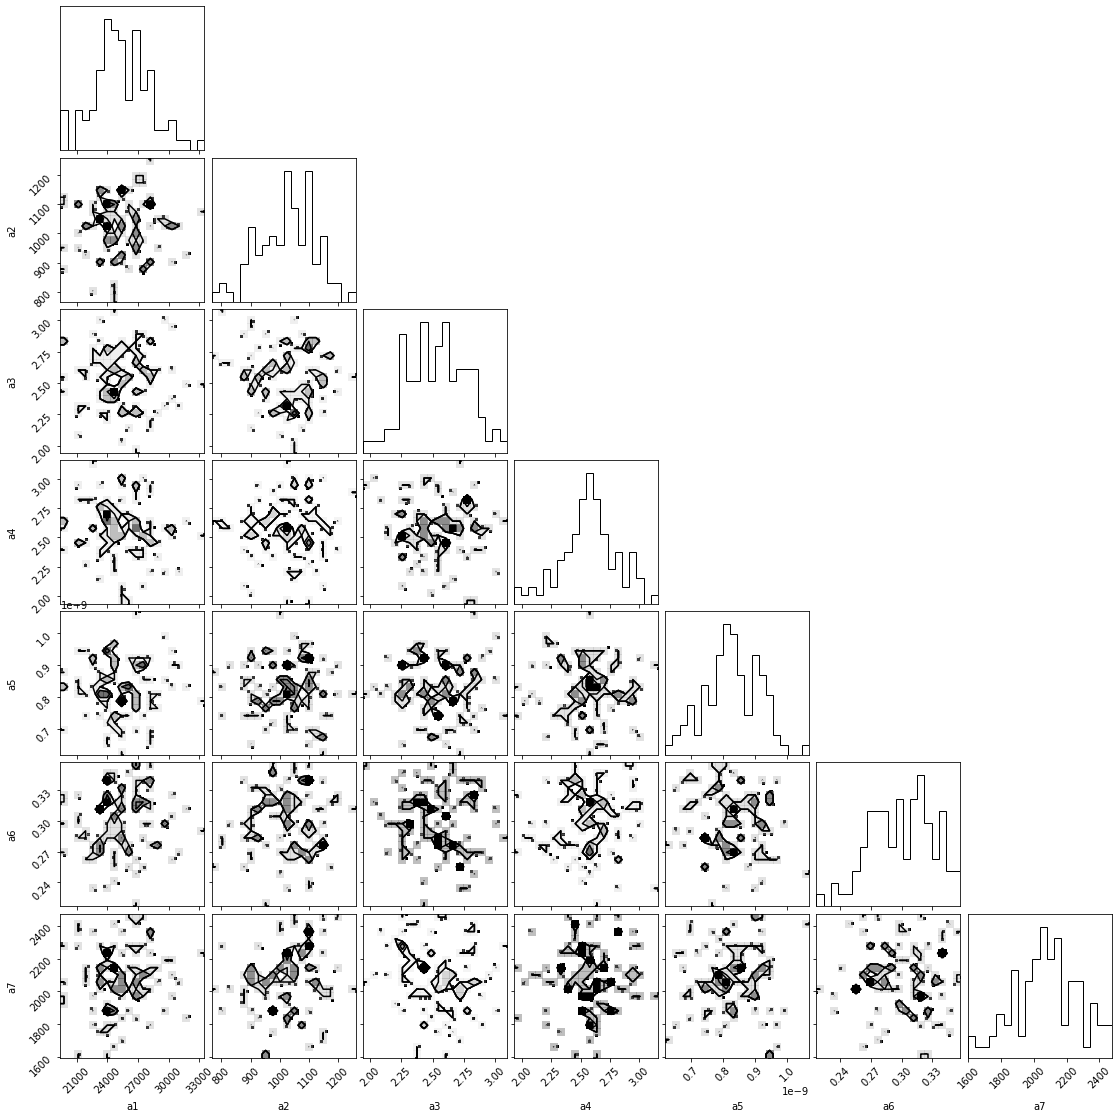

In [60]:
import corner

# m_dot_true = 1e-6
# # v_0_true = 10
# v_inf_true = 49862.87
# alpha_true = 1

labels = ["a1", "a2", "a3", "a4", "a5", "a6", "a7"]


fig = corner.corner(
    flat_samples, labels=labels, plot_datapoints=True
)


# , truths=[m_dot_true, v_inf_true, alpha_true]

Text(0.5, 0, 'step number')

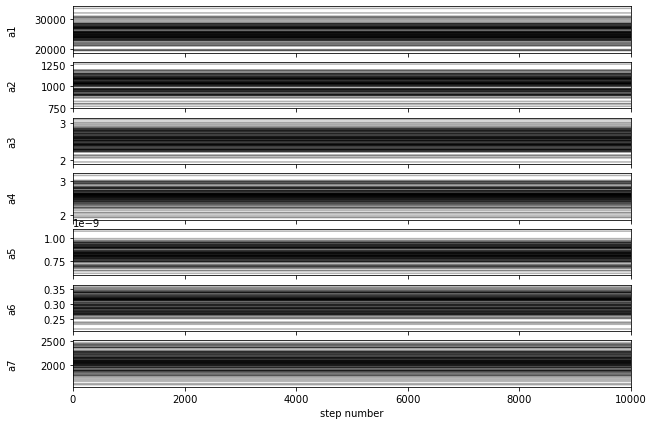

In [61]:
fig, axes = plt.subplots(7, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["a1", "a2", "a3", "a4", "a5", "a6", "a7"]

for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [1]:
#sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,lnprob,data)

In [18]:
def plotter(sampler,age=frequency,T=b_temp):
    plt.ion()
    plt.plot(age,T,label='Change in T')
    samples = sampler.flatchain
    for theta in samples[np.random.randint(len(samples), size=100)]:
        plt.plot(age, model(theta, age), color="r", alpha=0.1)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xlabel('Years ago')
    plt.ylabel(r'$\Delta$ T (degrees)')
    plt.legend()
    plt.show()

In [ ]:
sampler= main(p0)
plotter(sampler)

In [ ]:
type(frequency)

In [ ]:
a= 4
def gh(u):
    return a*u

In [ ]:
gh(a)